<a href="https://colab.research.google.com/github/Lostmindd/SimpleNeuron/blob/main/Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Обработка изображений**

In [ ]:
import os
import numpy as np
from PIL import Image

folder = '/content/drive/MyDrive/5_dataset'
X, y = [], []
for filename in os.listdir(folder):
    if filename.endswith('.bmp'):
        # метка
        label = 1 if filename.startswith('5') else 0

        # окрытие
        image_path = os.path.join(folder, filename)
        image = Image.open(image_path).convert('L')  #оттенки серого
        pixels = np.array(image).flatten()
        pixels = pixels / 255.0

        # сохранение
        X.append(pixels)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"Изображения: {X.shape}, метки: {y.shape}")

Изображения: (18, 15), метки: (18,)


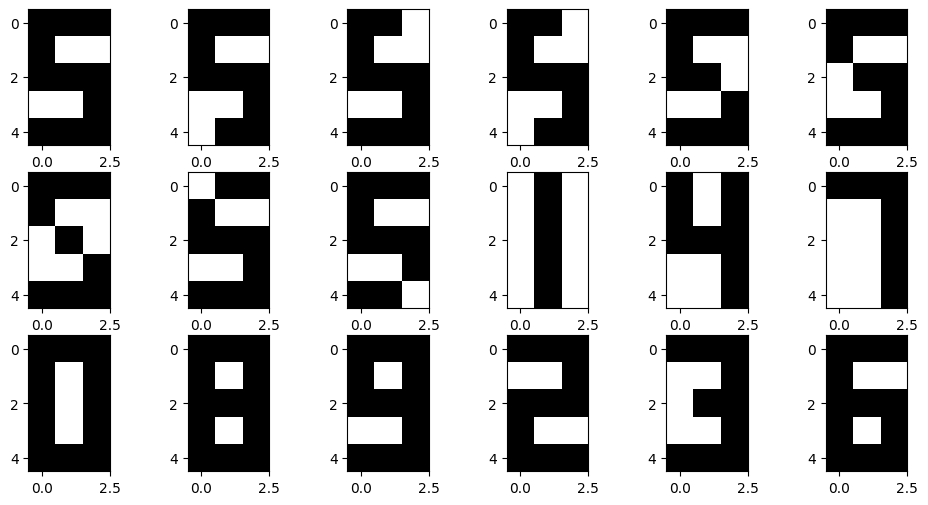

In [ ]:
import matplotlib.pyplot as plt

def show_digits():
  num_images = 18
  num_rows = 3
  num_images_per_row = 6

  fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(num_images_per_row * 2, num_rows * 2))
  axes = axes.flatten()

  for i in range(num_images):
      image = X[i].reshape(5, 3)
      axes[i].imshow(image, cmap='gray')

  plt.show()
show_digits()

**Нейрон**

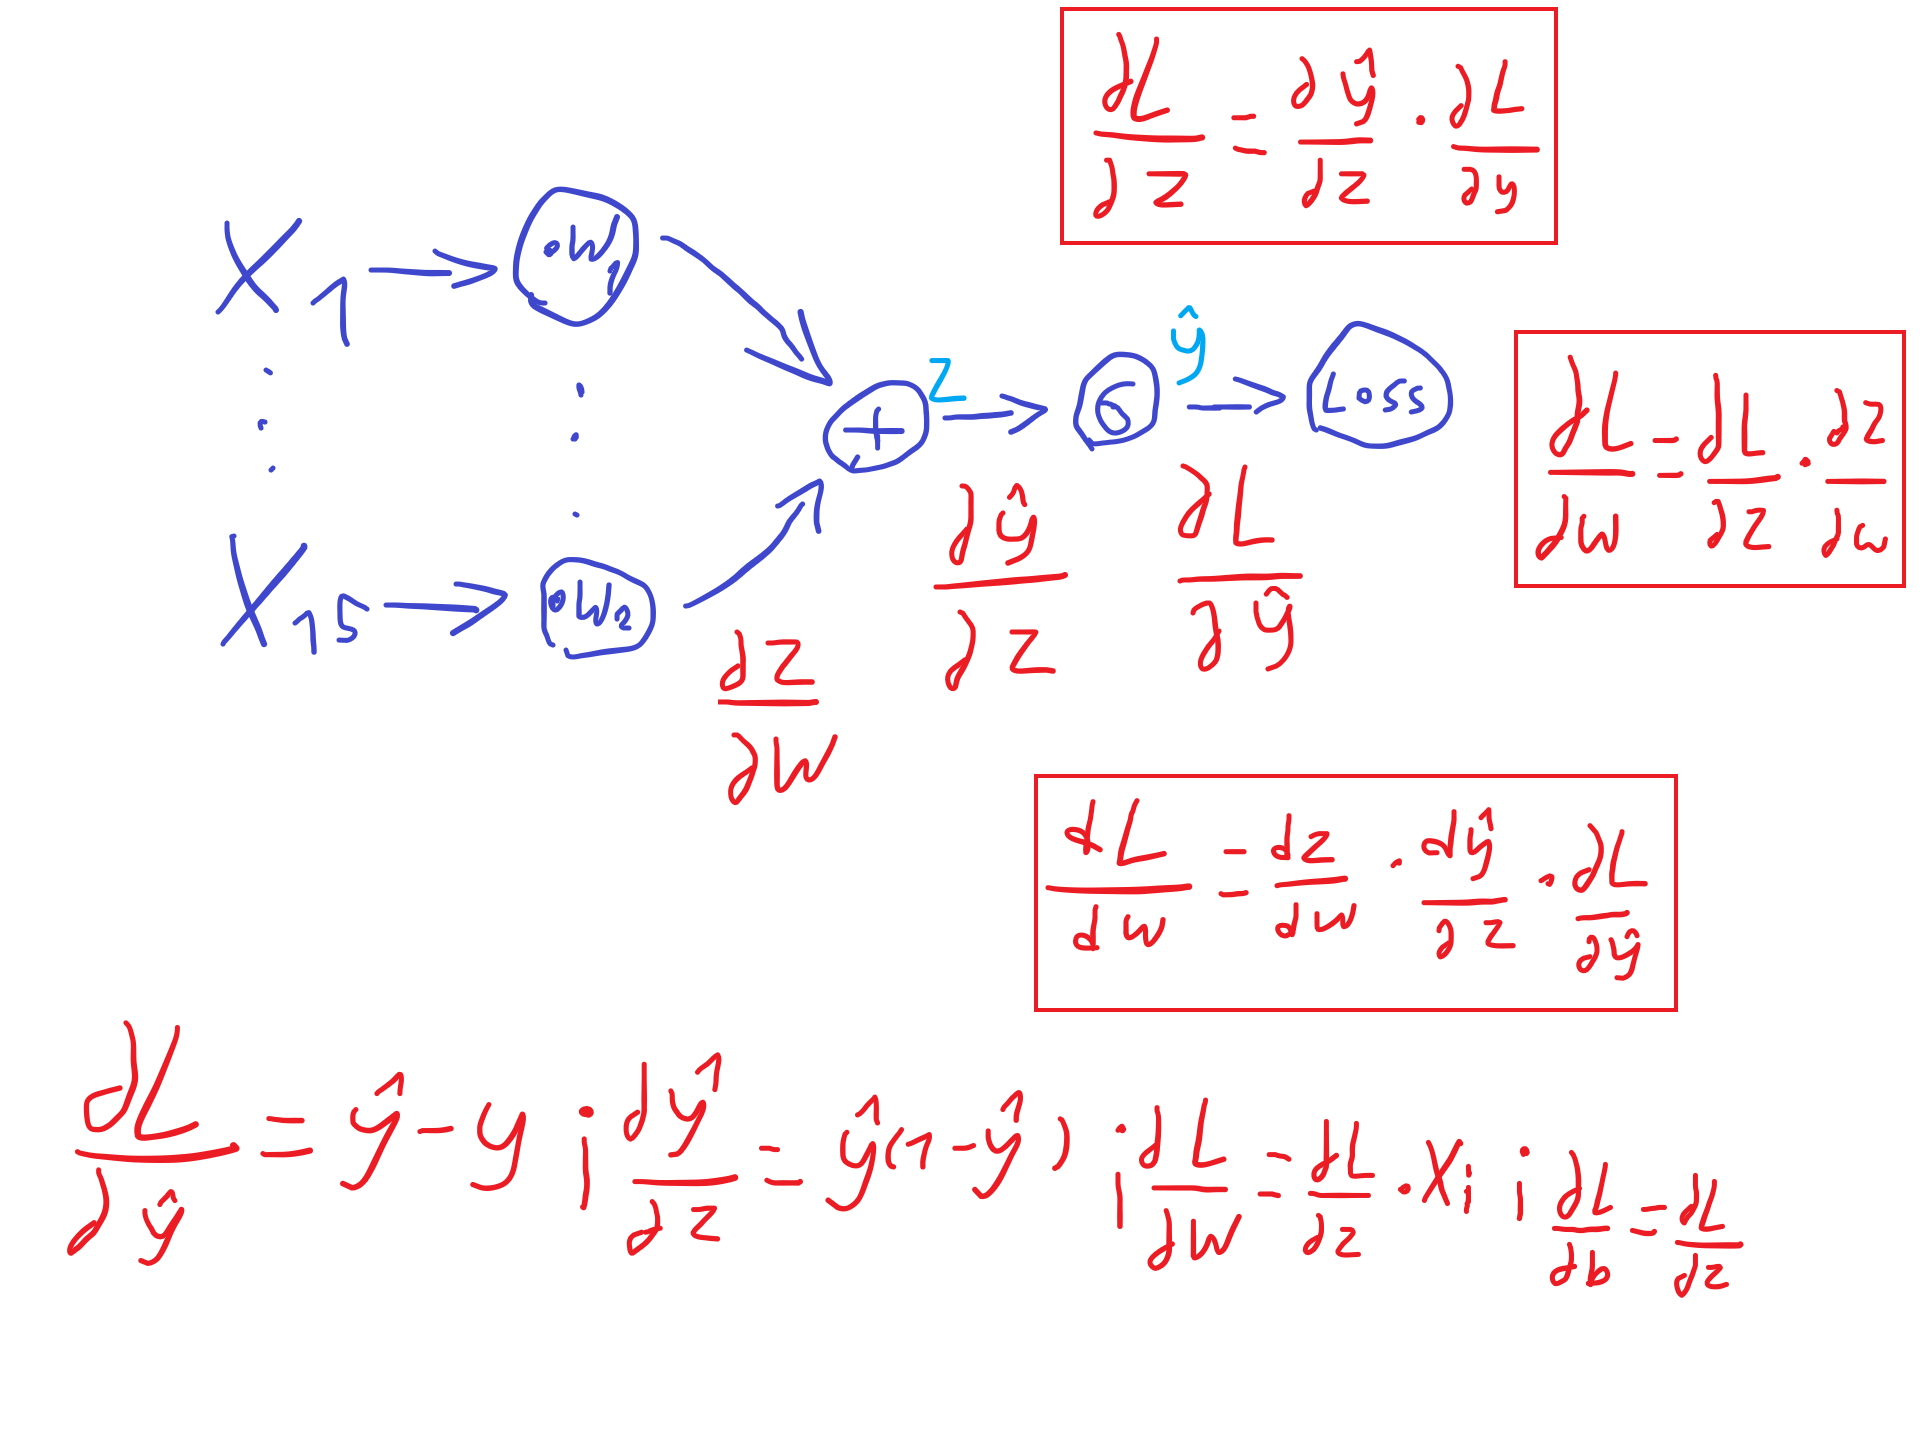

In [ ]:
import numpy as np

class Neuron:
    def __init__(self, input_size):
        self.weights = self.generate_weight(input_size)
        self.bias = np.random.randn()

    ## функции и производные
    def sigmoid(self, x): # сигмойда
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x): # сигмойда производная
        sigmoid_x = self.sigmoid(x)
        return sigmoid_x * (1 - sigmoid_x)

    def loss(self, y_true, y_pred): # кросс-энтропия
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def loss_derivative(self, y_true, y_pred): # кросс-энтропия производная
        return y_pred - y_true

    ## мат операции
    def generate_weight(self, input_size):
      weights = []
      for i in range(input_size):
          weights.append(np.random.randn())
      return np.array(weights)

    def summator(self, inputs, weights): # скалярное перемножение векторов
        sum = 0
        for i in range(len(inputs)):
          sum += inputs[i] * weights[i]
        return sum

    def multiplier(self, vector, x): # умножает вектор на число
        multiply = vector.copy()
        for i in range(len(vector)):
          multiply[i] *= x
        return multiply

    def subtractor(self, vector1, vector2): # вычитает вектор из вектора
        result = vector1.copy()
        for i in range(len(vector1)):
          result[i] -= vector2[i]
        return result

    ## основные методы
    def predict(self, x):  # прямое распространение
        z = self.summator(x, self.weights) + self.bias   # z = w * x + b
        y_pred = self.sigmoid(z)
        return y_pred

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for epoch in range(epochs):
            total_loss = 0  # loss на всей выборке
            for i in range(len(X)):
                x_i = X[i]
                y_true = y[i]

                # прямой проход
                z = self.summator(x_i, self.weights)
                y_pred = self.sigmoid(z)

                # лосс
                loss = self.loss(y_true, y_pred)
                total_loss += loss

                # dL/dz
                dL_dy_pred = self.loss_derivative(y_true, y_pred)
                dy_pred_dz = self.sigmoid_derivative(z)
                dL_dz = dL_dy_pred * dy_pred_dz

                # градиенты по весу и смещению
                dL_dw = self.multiplier(x_i, dL_dz)
                dL_db = dL_dz

                # шаг оптимизатора
                self.weights = self.subtractor(self.weights, self.multiplier(dL_dw, learning_rate))
                self.bias -= learning_rate * dL_db

            if epoch % 100 == 0:
                print(f"Эпоха {epoch}, loss: {total_loss / len(X)}")


# обучение
neuron = Neuron(input_size=15)
neuron.train(X, y)

Эпоха 0, loss: 0.9778136847153021
Эпоха 100, loss: 0.618287552409281
Эпоха 200, loss: 0.49748207300111574
Эпоха 300, loss: 0.42372382248103074
Эпоха 400, loss: 0.37725771636886357
Эпоха 500, loss: 0.3459726383569445
Эпоха 600, loss: 0.32343942519905944
Эпоха 700, loss: 0.3062869757446571
Эпоха 800, loss: 0.2926367771371217
Эпоха 900, loss: 0.2813735795686336


**Предсказание**

In [ ]:
y_pred_all = np.array([neuron.predict(X[i]) for i in range(18)])
y_pred_binary = (y_pred_all > 0.5).astype(int)
print(y_pred_binary)

accuracy = np.mean(y_pred_binary == y)
print(f"Точность: {accuracy:.4f}")

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1]
Точность: 0.9444


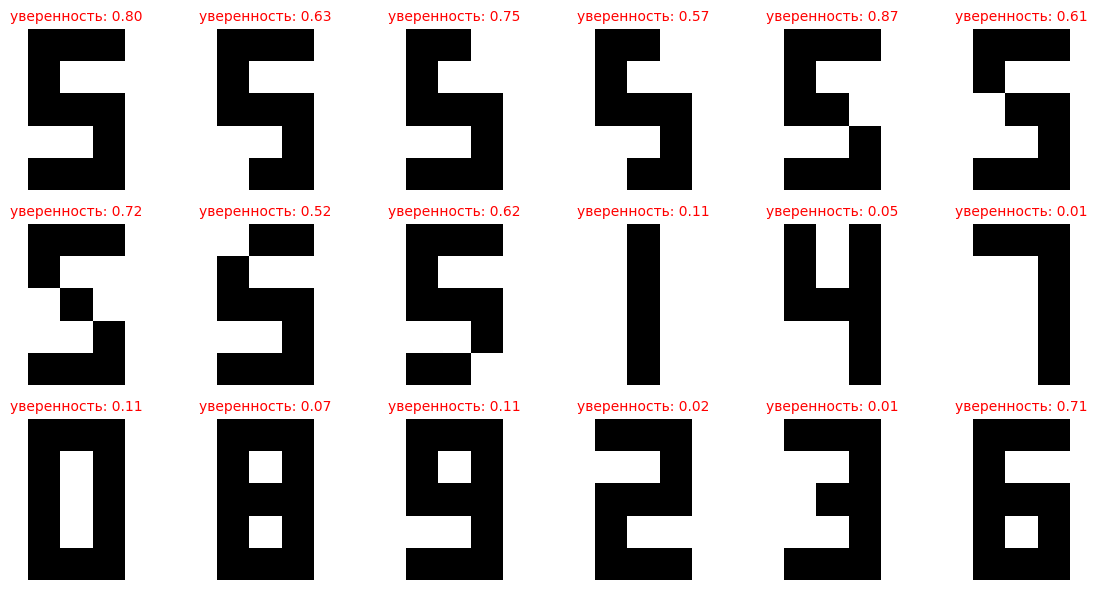

In [ ]:
import matplotlib.pyplot as plt

num_images = 18
num_rows = 3
num_images_per_row = 6

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(num_images_per_row * 2, num_rows * 2))
axes = axes.flatten()

for i in range(num_images):
    image = X[i].reshape(5, 3)
    axes[i].imshow(image, cmap='gray')

    y_pred = neuron.predict(X[i])

    axes[i].set_title(f"уверенность: {y_pred:.2f}", fontsize=10, color='red')
    axes[i].axis('off')

plt.show()

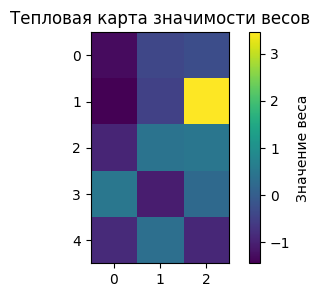

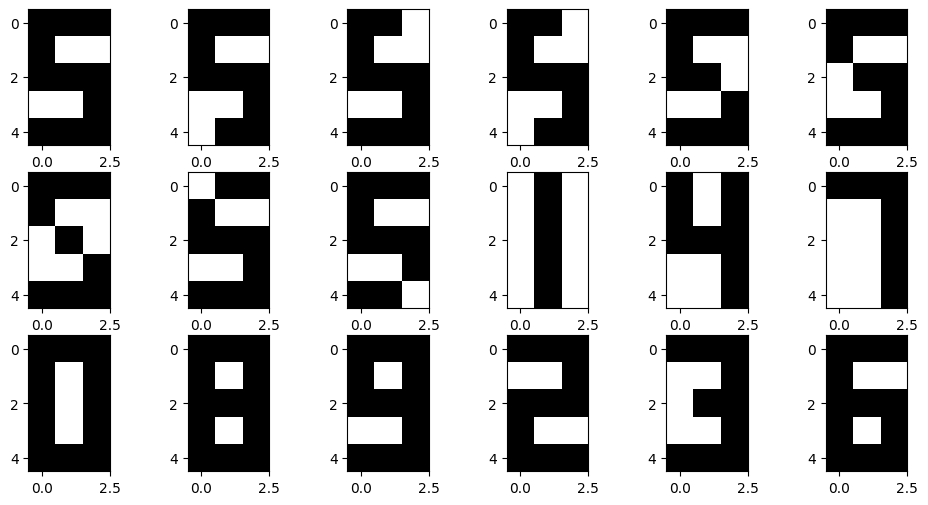

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_reshaped = neuron.weights.reshape(5, 3)

plt.figure(figsize=(5, 3))
plt.imshow(weights_reshaped, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Значение веса')
plt.title('Тепловая карта значимости весов')
plt.show()
show_digits()